# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import time

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head(10)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. World Happiness Report Data
2. We will be predicting the life expectancy at birth.
3. This is a supervised learning problem and a regression problem.
4. Country, year, life ladder, log GDP per capita, social support, freedom, generosity, corruption, positive affect, negative affect, confidence in government, democratic quality, delivery quality
5. The UN and researchers could use it to see which countries are suffering the most and which features contribute most to it so they can target those to increase life expectancy.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
has_null_any = df.isnull().sum()
print(has_null_any)

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [4]:
features = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']

In [5]:
df = df[features]

In [6]:
df.columns

Index(['country', 'year', 'Life Ladder', 'Positive affect', 'Negative affect',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption'],
      dtype='object')

In [7]:
new_names_dict = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df.rename(columns=new_names_dict, inplace=True)

In [8]:
df.head()

,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
0,Afghanistan,2008,3.723590,0.517637,0.258195,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686
1,Afghanistan,2009,4.401778,0.583926,0.237092,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035
2,Afghanistan,2010,4.758381,0.618265,0.275324,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766
3,Afghanistan,2011,3.831719,0.611387,0.267175,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109
4,Afghanistan,2012,3.782938,0.710385,0.267919,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620


In [10]:
df.describe

<bound method NDFrame.describe of           country  year  Happiness  Positive  Negative    LogGDP   Support  \
0     Afghanistan  2008   3.723590  0.517637  0.258195  7.168690  0.450662   
1     Afghanistan  2009   4.401778  0.583926  0.237092  7.333790  0.552308   
2     Afghanistan  2010   4.758381  0.618265  0.275324  7.386629  0.539075   
3     Afghanistan  2011   3.831719  0.611387  0.267175  7.415019  0.521104   
4     Afghanistan  2012   3.782938  0.710385  0.267919  7.517126  0.520637   
...           ...   ...        ...       ...       ...       ...       ...   
1557     Zimbabwe  2013   4.690188  0.711885  0.182288  7.565154  0.799274   
1558     Zimbabwe  2014   4.184451  0.725214  0.239111  7.562753  0.765839   
1559     Zimbabwe  2015   3.703191  0.715079  0.178861  7.556052  0.735800   
1560     Zimbabwe  2016   3.735400  0.737636  0.208555  7.538829  0.768425   
1561     Zimbabwe  2017   3.638300  0.806428  0.224051  7.538187  0.754147   

           Life   Freedom  Ge

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Our features will be: Happiness, Positive, Negative, LogGDP, Support, Life, Freedom, Generosity, Corruption. We chose to remove country and year since they aren't really numerical data points like the others and because we think they wouldn't be a useful feature since the other features should capture the particular country's important traits anyways.
2. Replace null values with averages of the column, normalize the numbers
3. We will be using a neural network. We will also use a decision tree regressor to compare the two models.
4. We will train it with 3 hidden layers with units being 64, 32, 16. We will use ReLu activation function and sgd optimizer. 25% train-test split. After we create and train the model, we will plot the accuracy and then change the epochs/units/learning-rate/etc. to get the best accuracy. Since the sample size is small, we will use k-fold cross validation. 


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [11]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


2024-08-05 01:17:15.321628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-05 01:17:15.321650: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [12]:
# YOUR CODE HERE


df = df.drop(columns = ['country','year'])
df_filled = df.apply(lambda x: x.fillna(x.mean()), axis=0)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_filled), columns=df_filled.columns)
y = df_filled['Life']
X = df_normalized.drop(columns = ['Life'])

In [13]:
print(X.isnull().sum())
print(X.shape)
print(y.isnull().sum())

Happiness     0
Positive      0
Negative      0
LogGDP        0
Support       0
Freedom       0
Generosity    0
Corruption    0
dtype: int64
(1562, 8)
0


In [14]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [15]:
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

In [16]:

# 1. Create model object:
nn_model = keras.Sequential()


# 2. Create the input layer and add it to the model object: 
# Create input layer:
input_layer = keras.layers.InputLayer(input_shape=(X.shape[1],), name='input')
# Add input_layer to the model object:
nn_model.add(input_layer)


# 3. Create the first hidden layer and add it to the model object:
# Create hidden layer:
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu', name='hl_1')
# Add hidden_layer_1 to the model object:
nn_model.add(hidden_layer_1)


# 4. Create the second hidden layer and add it to the model object:
# Create hidden layer:
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu', name='h1_2')
# Add hidden_layer_2 to the model object:
nn_model.add(hidden_layer_2)


# 5. Create the third hidden layer and add it to the model object:
# Create hidden layer:
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu', name='hl_3')
# Add hidden_layer_3 to the model object:
nn_model.add(hidden_layer_3)


# 6. Create the output layer and add it to the model object:
# Create output layer:
output_layer = keras.layers.Dense(units=1, activation='sigmoid', name='output') 
# Add output layer to model object
nn_model.add(output_layer)


# Print summary of neural network model structure
nn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hl_1 (Dense)                 (None, 64)                576       
_________________________________________________________________
h1_2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hl_3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


2024-08-05 01:18:39.592879: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-05 01:18:39.592900: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-05 01:18:39.592958: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-0937025d29c46da77): /proc/driver/nvidia/version does not exist
2024-08-05 01:18:39.593158: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.1)

In [18]:
loss_fn = keras.losses.MeanSquaredError()

In [19]:
nn_model.compile(optimizer=Adam(learning_rate=0.01), loss=loss_fn, metrics=['mean_squared_error'])

In [20]:
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation
mse_scores = []
histories = []
model = build_model()
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    
    history = model.fit(X_train, y_train, epochs=150, batch_size=20, verbose=0, callbacks=[ProgBarLoggerNEpochs(50, every_n=10)], validation_data=(X_val, y_val))
    
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)
    histories.append(history)

# Output the mean and standard deviation of the MSE scores
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Standard Deviation of MSE: {np.std(mse_scores)}")



2024-08-05 01:19:39.182438: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-08-05 01:19:39.186341: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2649995000 Hz


Epoch [10/ 50], Loss: 20.6389, Mean_squared_error: 20.6389, Val_loss: 20.0101, Val_mean_squared_error: 20.0101
Epoch [20/ 50], Loss: 20.3164, Mean_squared_error: 20.3164, Val_loss: 23.5410, Val_mean_squared_error: 23.5410
Epoch [30/ 50], Loss: 18.4483, Mean_squared_error: 18.4483, Val_loss: 17.3168, Val_mean_squared_error: 17.3168
Epoch [40/ 50], Loss: 22.7333, Mean_squared_error: 22.7333, Val_loss: 21.7754, Val_mean_squared_error: 21.7754
Epoch [50/ 50], Loss: 18.9869, Mean_squared_error: 18.9869, Val_loss: 17.0545, Val_mean_squared_error: 17.0545
Epoch [60/ 50], Loss: 19.7997, Mean_squared_error: 19.7997, Val_loss: 30.6840, Val_mean_squared_error: 30.6840
Epoch [70/ 50], Loss: 18.8669, Mean_squared_error: 18.8669, Val_loss: 17.7233, Val_mean_squared_error: 17.7233
Epoch [80/ 50], Loss: 20.1122, Mean_squared_error: 20.1122, Val_loss: 23.8376, Val_mean_squared_error: 23.8376
Epoch [90/ 50], Loss: 17.8151, Mean_squared_error: 17.8151, Val_loss: 16.6520, Val_mean_squared_error: 16.6520
E

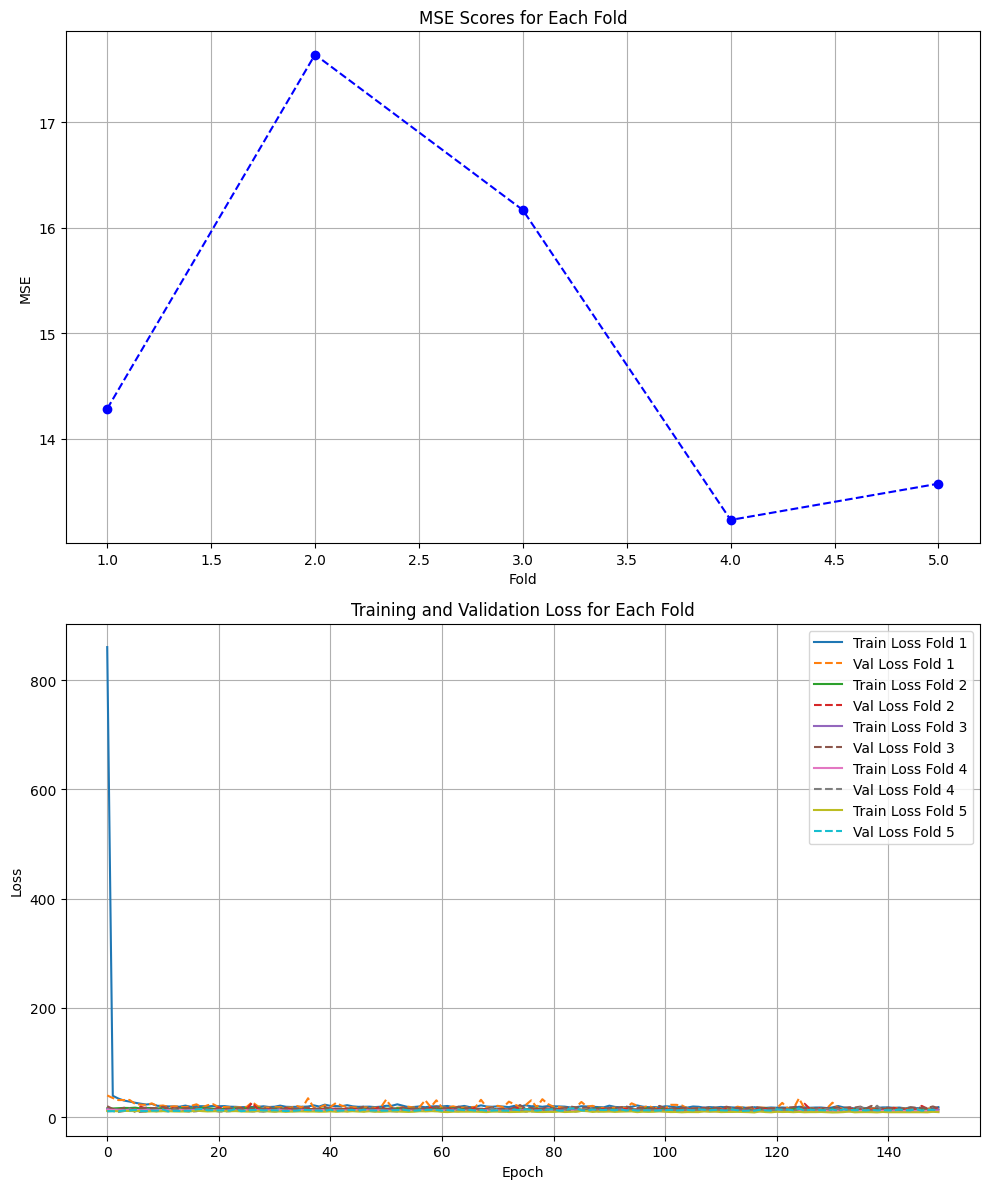

In [21]:


# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot MSE scores
axs[0].plot(range(1, len(mse_scores) + 1), mse_scores, marker='o', linestyle='--', color='b')
axs[0].set_title('MSE Scores for Each Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('MSE')
axs[0].grid(True)

# Plot training and validation loss curves
for i, history in enumerate(histories):
    axs[1].plot(history.history['loss'], label=f'Train Loss Fold {i+1}')
    axs[1].plot(history.history['val_loss'], linestyle='--', label=f'Val Loss Fold {i+1}')
axs[1].set_title('Training and Validation Loss for Each Fold')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Initialize the regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [24]:
# Predict on the test set
y_pred = regressor.predict(X_test)

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
sq = np.sqrt(mse)

In [26]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')
print(sq)

MAE: 2.4780186600294183
MSE: 17.296875214830525
R-squared: 0.723974315289255
4.15895121573102


In [27]:
print(y_pred)
print(y_test)

[64.96067047 51.52178955 68.77391052 46.52892685 71.56868744 70.72147369
 71.61430359 54.80181885 70.16835022 62.4943924  66.97756958 73.43118286
 68.29376984 53.32526779 63.62934875 53.49705887 62.24988743 55.88245392
 63.98104858 64.21484375 67.61258698 58.01321411 57.70112228 72.13491821
 57.48713303 64.89302063 60.08565903 69.60894012 65.29253387 75.30990601
 59.44197083 70.09518433 62.88409424 47.3938179  64.5315094  65.12363434
 71.8523407  49.17869949 64.35728455 56.80862808 70.01014709 61.28379059
 65.2917099  63.90904617 69.60894012 65.12363434 60.68158722 60.67469025
 71.64007568 67.6823349  64.70471954 66.83669281 69.56606293 73.63548279
 51.99484634 71.10689545 67.19199371 66.75059509 68.87181091 65.7313385
 53.8613472  62.3057518  65.8757782  74.09434509 71.10689545 63.87771225
 53.27974319 59.42887115 48.38543701 66.05983734 52.67448425 64.19011688
 60.27038956 62.41413879 72.14292908 71.5181427  65.45373535 45.81098557
 51.95782089 71.086586   67.75796509 72.35971069 70.

What We Did:
We can see that training the neural network for more epochs led to a better mean squared error result than using a un-tuned decision tree. We spent time optimizing the neural network by increasing the number of epochs and changing the batch size to get to an ultimate mean squared error of 8.5 which is much better than the mean squared error of 17.3 that the decision tree gave us.